# Template Matching

### Full Image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
full = cv2.imread('../DATA/Jeddah_balad_architecture.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

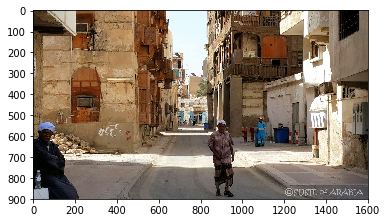

In [48]:
plt.imshow(full)

### Template Image

A subset of the image. Note how its actually the exact image. Later on we'll discuss more advanced methods for general matching, such as facial recognition.

In [49]:
face= cv2.imread('../DATA/Jeddah_balad_architecture1.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

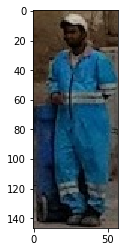

In [50]:
plt.imshow(face)

# Template Matching Methods



In [51]:
sum([1,2,3])

6

In [52]:
mystring = 'sum'

In [53]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [54]:
myfunc = eval(mystring)

In [55]:
myfunc([1,2,3])

6

In [56]:
height, width,channels = face.shape

In [57]:
width

57

In [58]:
height

147

In [61]:
# The Full Image to Search
full = cv2.imread('../DATA/Jeddah_balad_architecture.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('../DATA/Jeddah_balad_architecture1.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

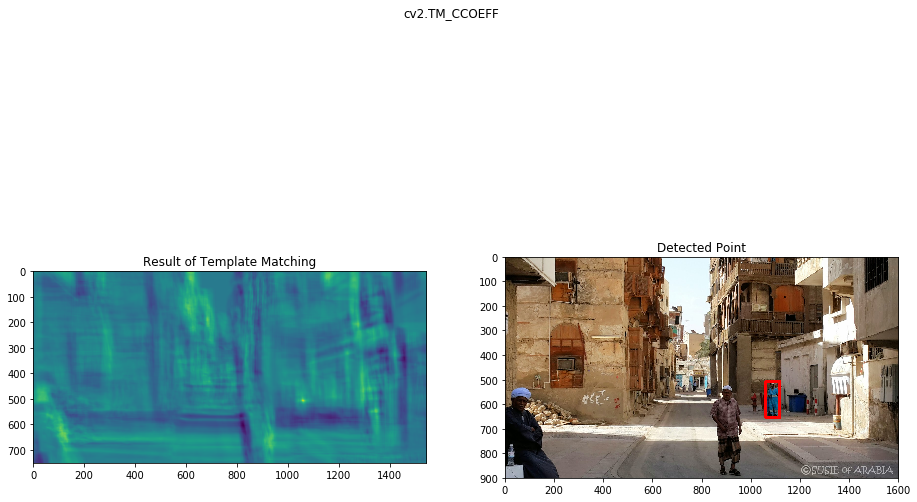

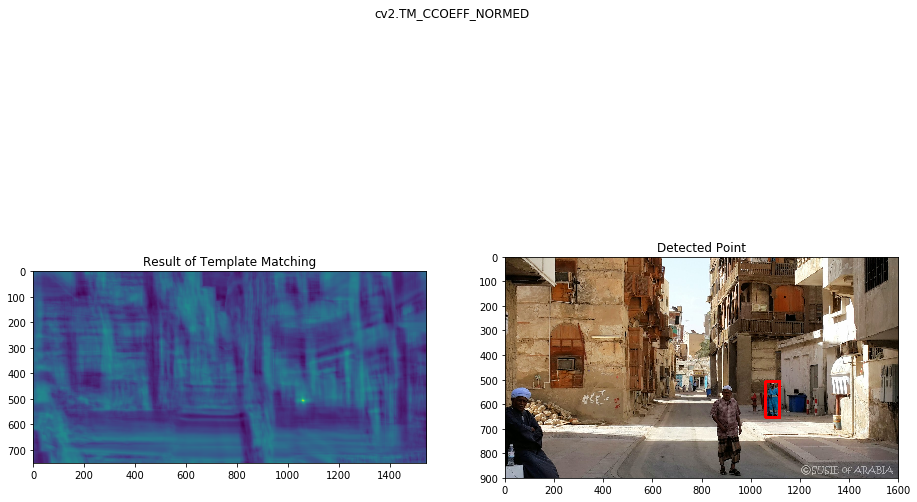

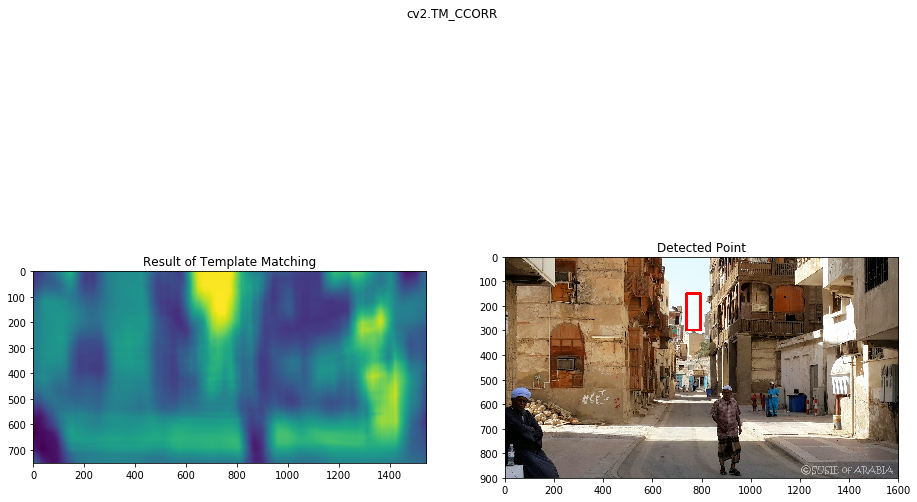

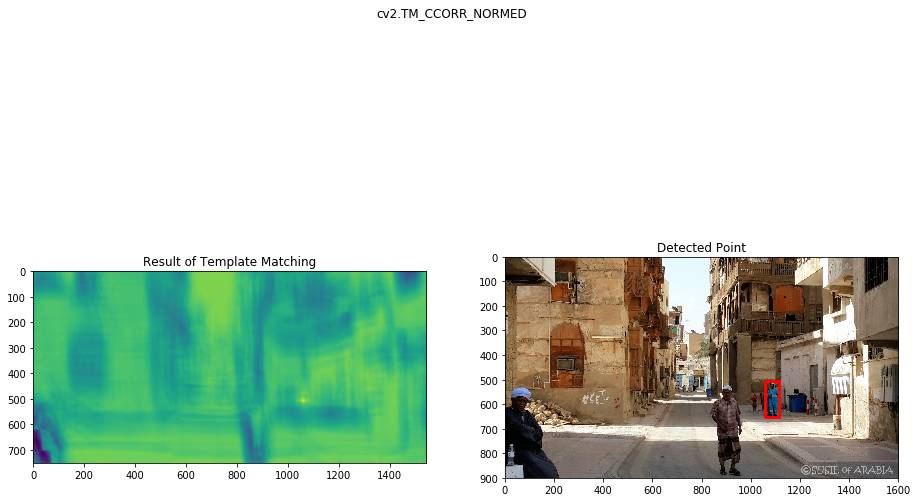

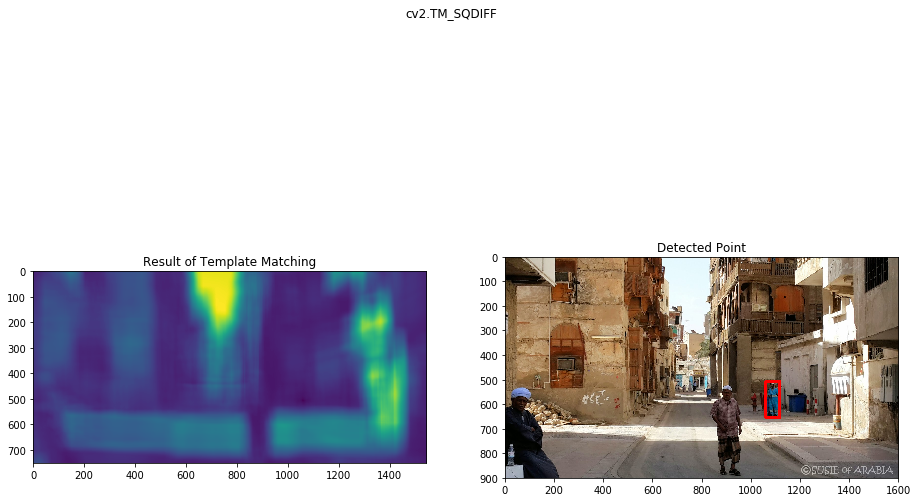

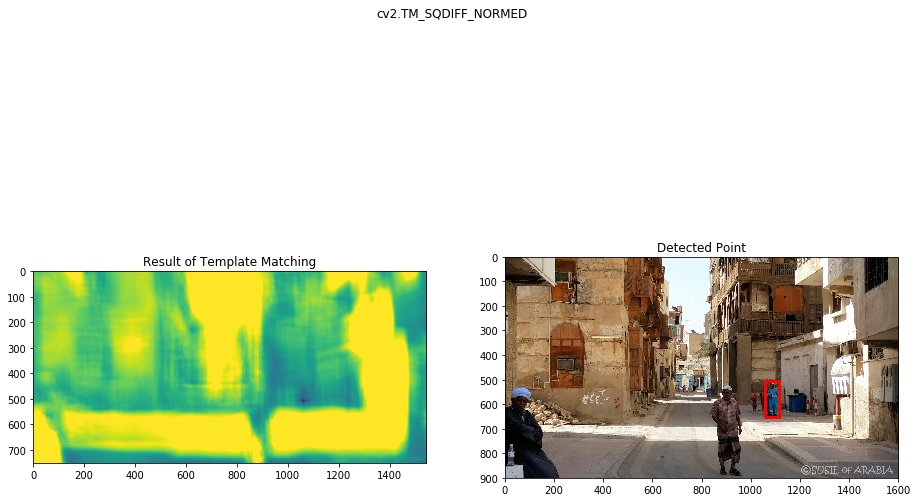

In [71]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    #(x,y)
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.figure(figsize=(15.5,10.5))
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

##### We see from the above example only TM_CCoRR_NORMED didn't get it correctly!